In [1]:
import numpy as np 
import pandas as pd

In [2]:
df= pd.read_csv("data/loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape


(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## handiling missing values 

In [10]:
# Fill categorical features with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

# Fill numerical features
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipykernel_48451/3924771637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
/tmp/ipykernel_48451/3924771637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## slecting deature and categorizinf them into numeric and categorical 

In [52]:
## Categorical features
cat_features=["Married","Education","Self_Employed","Property_Area"]

## Numerical Feature 
num_features=["ApplicantIncome","LoanAmount","Credit_History"]



# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

# target=df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# ## Target Values 
target=["Loan_Status"]

## Categorical feature  into datape

In [50]:
for feature in cat_features:
    df[feature]=df[feature].astype('category')

## spliting the data into test train and split

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


import pandas as pd

# Load your CSV again
df = pd.read_csv("data/loan.csv")  # Adjust filename

# Clean up column names (remove hidden spaces)
df.columns = df.columns.str.strip()

# Strip whitespace and convert to uppercase in target column
df['Loan_Status'] = df['Loan_Status'].astype(str).str.strip().str.upper()

# Keep only valid Y/N entries
df = df[df['Loan_Status'].isin(['Y', 'N'])]

# Map Y/N to 1/0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Double check row count
print("🧪 Cleaned dataset size:", df.shape)
print("✅ Loan_Status distribution:\n", df['Loan_Status'].value_counts())

# Define your features again
num_features = ["ApplicantIncome", "LoanAmount", "Credit_History"]
cat_features = ["Married", "Education", "Self_Employed", "Property_Area"]

# Create feature matrix
X = df[num_features + cat_features]
X = pd.get_dummies(X, drop_first=True)

# Target
y = df['Loan_Status']

# Confirm shape
print("✅ Final shapes - X:", X.shape, ", y:", y.shape)

# Now split safely
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🧪 Cleaned dataset size: (614, 13)
✅ Loan_Status distribution:
 Loan_Status
1    422
0    192
Name: count, dtype: int64
✅ Final shapes - X: (614, 8) , y: (614,)


## Selecting the Model and listing the model 


In [71]:
models={
    #    "Logistic Regression": {
    #     "model": LogisticRegression(),
    #     "params": {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}
    # },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {"max_depth": [3, 5, 10], "criterion": ["gini", "entropy"]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [50, 100], "max_depth": [5, 10]}
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(),
        "params": {"learning_rate": [0.01, 0.1], "n_estimators": [100, 200]}
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {"depth": [4, 6], "learning_rate": [0.01, 0.1]}
    }

}

In [72]:
from sklearn.model_selection import GridSearchCV

results=[]

for model_name,config in models.items():
    print(model_name)
    grid_search=GridSearchCV(config["model"],config["params"],cv=5,scoring="accuracy")
    grid_search.fit(X_train,y_train)
    

    results.append({
        "Model":model_name,
        "Best Score":grid_search.best_score_,
        "Best Params":grid_search.best_params_
    })

Decision Tree
Random Forest
XGBoost
CatBoost


In [73]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values(by="Best Score", ascending=False, inplace=True)
print(results_df)


           Model  Best Score                                   Best Params
1  Random Forest    0.814574          {'max_depth': 5, 'n_estimators': 50}
0  Decision Tree    0.810555      {'criterion': 'entropy', 'max_depth': 3}
2        XGBoost    0.810513  {'learning_rate': 0.01, 'n_estimators': 100}
3       CatBoost    0.796228           {'depth': 4, 'learning_rate': 0.01}


Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



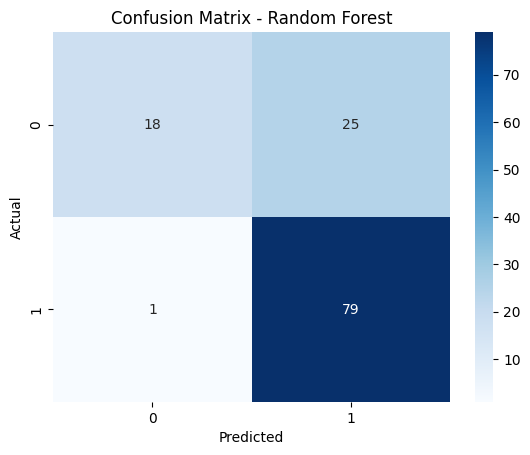

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Retrain the best Random Forest model
best_rf = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)
best_rf.fit(X_train, y_train)

# Predict
y_pred = best_rf.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
